# Importing Libraries

In [3]:
import pandas as pd          # importing pandas for data manipulation
import numpy as np         # importing numpy for numerical, array manipulation
import os                   # importing os to connect with local system
import random                  # importing random
import matplotlib.pyplot as plt        # importing some more libraries for visualization
import seaborn as sns               # importing seaborn for visualization
import plotly.graph_objects as go     # importing plotly  for visualization
import plotly.io as pio                             
import plotly.offline as pyo
import plotly.express as px 
import calendar                                  # importing calender
from collections import Counter                 # importing counter library for counting purpose
from imblearn.over_sampling import SMOTE       # importing smote for oversmapling and data balancing
from imblearn.combine import SMOTETomek
pd.set_option('display.max_columns', 500)      # setting pandas display
pd.set_option('display.max_rows',500)
import warnings                         # importing warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## Reading data from RawFiles

In [4]:
data = pd.read_csv('data_Q1_2022/2022-01-01.csv')      # reading data from one raw file

In [5]:
data.head()            # visualising first five rows

date serial_number                model  capacity_bytes  failure  \
0  2022-01-01      ZLW18P9K        ST14000NM001G  14000519643136        0   
1  2022-01-01      ZLW0EGC7        ST12000NM001G  12000138625024        0   
2  2022-01-01      ZA1FLE1P         ST8000NM0055   8001563222016        0   
3  2022-01-01      ZA16NQJR         ST8000NM0055   8001563222016        0   
4  2022-01-01  1050A084F97G  TOSHIBA MG07ACA14TA  14000519643136        0   

   smart_1_normalized  smart_1_raw  smart_2_normalized  smart_2_raw  \
0                73.0   20467240.0                 NaN          NaN   
1                84.0  228715872.0                 NaN          NaN   
2                82.0  157857120.0                 NaN          NaN   
3                84.0  234265456.0                 NaN          NaN   
4               100.0          0.0               100.0          0.0   

   smart_3_normalized  smart_3_raw  smart_4_normalized  smart_4_raw  \
0                90.0          0.0               100.0         12.0   
1                99.0          0.0               100.0          1.0   
2                91.0          0.0               100.0          7.0   
3                89.0          0.0               100.0          8.0   
4               100.0       7901.0               100.0          2.0   

   smart_5_normalized  smart_5_raw  smart_7_normalized   smart_7_raw  \
0               100.0          0.0                87.0  4.958466e+08   
1               100.0          0.0                90.0  9.050875e+08   
2               100.0          0.0                93.0  1.858835e+09   
3               100.0          0.0                95.0  2.891516e+09   
4               100.0          0.0               100.0  0.000000e+00   

   smart_8_normalized  smart_8_raw  smart_9_normalized  smart_9_raw  \
0                 NaN          NaN                89.0       9937.0   
1                 NaN          NaN                85.0      13174.0   
2                 NaN          NaN                86.0      12781.0   
3                 NaN          NaN                54.0      40970.0   
4               100.0          0.0                85.0       6104.0   

   smart_10_normalized  smart_10_raw  smart_11_normalized  smart_11_raw  \
0                100.0           0.0                  NaN           NaN   
1                100.0           0.0                  NaN           NaN   
2                100.0           0.0                  NaN           NaN   
3                100.0           0.0                  NaN           NaN   
4                100.0           0.0                  NaN           NaN   

   smart_12_normalized  smart_12_raw  smart_13_normalized  smart_13_raw  \
0                100.0          12.0                  NaN           NaN   
1                100.0           1.0                  NaN           NaN   
2                100.0           7.0                  NaN           NaN   
3                100.0           8.0                  NaN           NaN   
4                100.0           2.0                  NaN           NaN   

   smart_15_normalized  smart_15_raw  smart_16_normalized  smart_16_raw  \
0                  NaN           NaN                  NaN           NaN   
1                  NaN           NaN                  NaN           NaN   
2                  NaN           NaN                  NaN           NaN   
3                  NaN           NaN                  NaN           NaN   
4                  NaN           NaN                  NaN           NaN   

   smart_17_normalized  smart_17_raw  smart_18_normalized  smart_18_raw  \
0                  NaN           NaN                100.0           0.0   
1                  NaN           NaN                100.0           0.0   
2                  NaN           NaN                  NaN           NaN   
3                  NaN           NaN                  NaN           NaN   
4                  NaN           NaN                  NaN           NaN   

   smart_22_normalized  smar

In [6]:
data.tail()            # visualising last five rows

date serial_number                 model  capacity_bytes  \
206949  2022-01-01      ZA10MCEQ           ST8000DM002   8001563222016   
206950  2022-01-01      ZA13ZBCT           ST8000DM002   8001563222016   
206951  2022-01-01      ZHZ3QPZX         ST12000NM0008  12000138625024   
206952  2022-01-01  41B0A01LFV8G  TOSHIBA MG08ACA16TEY  16000900661248   
206953  2022-01-01      X0GEV9EC   WDC WUH721414ALE6L4  14000519643136   

        failure  smart_1_normalized  smart_1_raw  smart_2_normalized  \
206949        0                80.0  109616432.0                 NaN   
206950        0                78.0   62303504.0                 NaN   
206951        0                77.0   48195944.0                 NaN   
206952        0               100.0          0.0               100.0   
206953        0               100.0          0.0               138.0   

        smart_2_raw  smart_3_normalized  smart_3_raw  smart_4_normalized  \
206949          NaN                92.0          0.0               100.0   
206950          NaN                86.0          0.0               100.0   
206951          NaN                91.0          0.0               100.0   
206952          0.0               100.0       5428.0               100.0   
206953         93.0                85.0        316.0               100.0   

        smart_4_raw  smart_5_normalized  smart_5_raw  smart_7_normalized  \
206949          4.0               100.0          8.0                91.0   
206950         10.0               100.0          0.0                85.0   
206951         13.0               100.0          0.0                89.0   
206952         11.0               100.0          0.0               100.0   
206953          3.0               100.0          0.0               100.0   

         smart_7_raw  smart_8_normalized  smart_8_raw  smart_9_normalized  \
206949  1.169556e+09                 NaN          NaN                45.0   
206950  3.243192e+08                 NaN          NaN                50.0   
206951  8.134566e+08                 NaN          NaN                78.0   
206952  0.000000e+00               100.0          0.0                91.0   
206953  0.000000e+00               133.0         18.0                99.0   

        smart_9_raw  smart_10_normalized  smart_10_raw  smart_11_normalized  \
206949      48482.0                100.0           0.0                  NaN   
206950      44621.0                100.0           0.0                  NaN   
206951      19563.0                100.0           0.0                  NaN   
206952       3987.0                100.0           0.0                  NaN   
206953      10329.0                100.0           0.0                  NaN   

        smart_11_raw  smart_12_normalized  smart_12_raw  smart_13_normalized  \
206949           NaN                100.0           4.0                  NaN   
206950           NaN                100.0          10.0                  NaN   
206951           NaN                100.0          12.0                  NaN   
206952           NaN                100.0          11.0                  NaN   
206953           NaN                100.0           3.0                  NaN   

        smart_13_raw  smart_15_normalized  smart_15_raw  smart_16_normalized  \
206949           NaN                  NaN           NaN                  NaN   
206950           NaN                  NaN           NaN                  NaN   
206951           NaN                  NaN           NaN                  NaN   
206952           NaN                  NaN           NaN                  NaN   
206953           NaN                  NaN           NaN                  NaN   

        smart_16_raw  smart_17_normalized  smart_17_raw  smart_18_normalized  \
206949           NaN                  NaN           NaN                  NaN   
206950           NaN                  NaN           NaN                  NaN   
206951           NaN                  NaN           NaN                100.0   
20

In [7]:
data['failure'].value_counts()      # getting counts of classes in target variable

0    206951
1         3
Name: failure, dtype: int64

#### From one file it is clear that data is highly imbalanced and the counts of '1' is very low. Therefore We have to make a dataset on own by extracting data from all files having target value '1' to increase counts of '1' followed by random sampling of data having target '0' from all files in a order so that equal distribution can be maintained.

### Extracting data from All Files of Year 2022

##### Extracting data where taget class is '1' 

In [8]:
# folder_path = 'data_Q1_2022'

# # Initialize an empty DataFrame to store the concatenated data
# concatenated_data1 = pd.DataFrame()

# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".csv"):
#         # Read the CSV file into a DataFrame
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)

#         # Extract rows where "failure" is equal to 1
#         failed_rows = df[df['failure'] == 1]

#         # Concatenate the selected rows to the main DataFrame
#         concatenated_data1 = pd.concat([concatenated_data1, failed_rows])

# # Reset the index of the concatenated DataFrame
# concatenated_data1.reset_index(drop=True, inplace=True)

In [9]:
# folder_path = 'data_Q2_2022'

# # Initialize an empty DataFrame to store the concatenated data
# concatenated_data2 = pd.DataFrame()

# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".csv"):
#         # Read the CSV file into a DataFrame
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)

#         # Extract rows where "failure" is equal to 1
#         failed_rows = df[df['failure'] == 1]

#         # Concatenate the selected rows to the main DataFrame
#         concatenated_data2 = pd.concat([concatenated_data2, failed_rows])

# # Reset the index of the concatenated DataFrame
# concatenated_data2.reset_index(drop=True, inplace=True)

In [10]:
# folder_path = 'data_Q3_2022'

# # Initialize an empty DataFrame to store the concatenated data
# concatenated_data3 = pd.DataFrame()

# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".csv"):
#         # Read the CSV file into a DataFrame
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)

#         # Extract rows where "failure" is equal to 1
#         failed_rows = df[df['failure'] == 1]

#         # Concatenate the selected rows to the main DataFrame
#         concatenated_data3 = pd.concat([concatenated_data3, failed_rows])

# # Reset the index of the concatenated DataFrame
# concatenated_data3.reset_index(drop=True, inplace=True)

In [11]:
# folder_path = 'data_Q4_2022'

# # Initialize an empty DataFrame to store the concatenated data
# concatenated_data4 = pd.DataFrame()

# # Loop through each file in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(".csv"):
#         # Read the CSV file into a DataFrame
#         file_path = os.path.join(folder_path, filename)
#         df = pd.read_csv(file_path)

#         # Extract rows where "failure" is equal to 1
#         failed_rows = df[df['failure'] == 1]

#         # Concatenate the selected rows to the main DataFrame
#         concatenated_data4 = pd.concat([concatenated_data4, failed_rows])

# # Reset the index of the concatenated DataFrame
# concatenated_data4.reset_index(drop=True, inplace=True)

In [12]:
# final_concat_data =  pd.concat([concatenated_data1, concatenated_data2, concatenated_data3, concatenated_data4])  #concatenate data from all files
# final_concat_data.shape          # shape of data

In [13]:
#final_concat_data.to_csv('Dataset_HDD_Failure.csv')     # saving extracted and concatenated data into csv file

##### Extracting data where target class is '0'

In [14]:
# dataset_path = 'data_Q1_2022'

# # Initialize an empty DataFrame to store the extracted rows
# concatenated_data5 = pd.DataFrame()

# # Loop through each CSV file in the dataset folder
# for filename in os.listdir(dataset_path):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(dataset_path, filename)

#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Extract random 150 rows where failure is "0"
#         rows_failure_0 = df[df['failure'] == 0].sample(n=150, random_state=42)

#         # Concatenate the extracted rows to the new dataset
#         concatenated_data5 = pd.concat([concatenated_data5, rows_failure_0])

# # Reset the index of the concatenated dataset
# concatenated_data5.reset_index(drop=True, inplace=True)

In [15]:
# dataset_path = 'data_Q2_2022'

# # Initialize an empty DataFrame to store the extracted rows
# concatenated_data6 = pd.DataFrame()

# # Loop through each CSV file in the dataset folder
# for filename in os.listdir(dataset_path):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(dataset_path, filename)

#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Extract random 150 rows where failure is "0"
#         rows_failure_0 = df[df['failure'] == 0].sample(n=150, random_state=42)

#         # Concatenate the extracted rows to the new dataset
#         concatenated_data6 = pd.concat([concatenated_data6, rows_failure_0])

# # Reset the index of the concatenated dataset
# concatenated_data6.reset_index(drop=True, inplace=True)

In [16]:
# dataset_path = 'data_Q3_2022'

# # Initialize an empty DataFrame to store the extracted rows
# concatenated_data7 = pd.DataFrame()

# # Loop through each CSV file in the dataset folder
# for filename in os.listdir(dataset_path):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(dataset_path, filename)

#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Extract random 150 rows where failure is "0"
#         rows_failure_0 = df[df['failure'] == 0].sample(n=150, random_state=42)

#         # Concatenate the extracted rows to the new dataset
#         concatenated_data7 = pd.concat([concatenated_data7, rows_failure_0])

# # Reset the index of the concatenated dataset
# concatenated_data7.reset_index(drop=True, inplace=True)

In [17]:
# dataset_path = 'data_Q4_2022'

# # Initialize an empty DataFrame to store the extracted rows
# concatenated_data8 = pd.DataFrame()

# # Loop through each CSV file in the dataset folder
# for filename in os.listdir(dataset_path):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(dataset_path, filename)

#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(file_path)

#         # Extract random 150 rows where failure is "0"
#         rows_failure_0 = df[df['failure'] == 0].sample(n=150, random_state=42)

#         # Concatenate the extracted rows to the new dataset
#         concatenated_data8 = pd.concat([concatenated_data8, rows_failure_0])

# # Reset the index of the concatenated dataset
# concatenated_data8.reset_index(drop=True, inplace=True)

In [18]:
# final_concat_data_1 =  pd.concat([concatenated_data5, concatenated_data6, concatenated_data7, concatenated_data8])   # concatenating extracted data 
# final_concat_data_1.shape     # shape of concatenated data

In [19]:
#final_concat_data_1.to_csv('Dataset_HDD_Non_Failure.csv')     # saving data to csv file

### Reading New Extracted data

In [20]:
df_failure = pd.read_csv('Dataset_HDD_Failure.csv')   # reading data where target is '1'
df_non_failure = pd.read_csv('Dataset_HDD_Non_Failure.csv')   # reading data where target is '0'
new_dataset = pd.concat([df_failure,df_non_failure])   # concatenating the whole data
new_dataset.reset_index(drop=True, inplace=True)         # resetting index
new_dataset = new_dataset.drop(['Unnamed: 0'],axis=1)     # dropping unecessary colum

In [21]:
new_dataset.head(10)       # visualising the first 10 rows of new data

date serial_number                 model  capacity_bytes  failure  \
0  2022-01-01      WDH1BET6           ST4000DM005   4000787030016        1   
1  2022-01-01     96BDP79NT    TOSHIBA MQ01ABF050    500107862016        1   
2  2022-01-01      ZA180YKM          ST8000NM0055   8001563222016        1   
3  2022-01-02      ZHZ4YA04         ST12000NM0008  12000138625024        1   
4  2022-01-02      ZHZ3PXX8         ST12000NM0008  12000138625024        1   
5  2022-01-02      Z302SZJB           ST4000DM000   4000787030016        1   
6  2022-01-02      8HH2SDRH  HGST HUH721212ALE604  12000138625024        1   
7  2022-01-02      5PHRWLWD  HGST HUH721212ALE604  12000138625024        1   
8  2022-01-02      ZLW0TZ79         ST12000NM001G  12000138625024        1   
9  2022-01-02      ZHZ3T1AC         ST12000NM0008  12000138625024        1   

   smart_1_normalized  smart_1_raw  smart_2_normalized  smart_2_raw  \
0                59.0  147088624.0                 NaN          NaN   
1               100.0          0.0               100.0          0.0   
2                84.0  235414912.0                 NaN          NaN   
3                79.0   70963736.0                 NaN          NaN   
4                70.0   94032960.0                 NaN          NaN   
5               119.0  204006728.0                 NaN          NaN   
6               100.0          0.0               132.0         96.0   
7               100.0          0.0               130.0        100.0   
8                80.0   99327104.0                 NaN          NaN   
9                 NaN          NaN                 NaN          NaN   

   smart_3_normalized  smart_3_raw  smart_4_normalized  smart_4_raw  \
0                94.0          0.0               100.0          8.0   
1               100.0       1359.0               100.0         16.0   
2                92.0          0.0               100.0          6.0   
3                90.0          0.0               100.0         11.0   
4                97.0          0.0               100.0          3.0   
5                92.0          0.0               100.0         24.0   
6               100.0          0.0               100.0          7.0   
7               100.0          0.0               100.0          5.0   
8                93.0          0.0               100.0          6.0   
9                 NaN          NaN                 NaN          NaN   

   smart_5_normalized  smart_5_raw  smart_7_normalized   smart_7_raw  \
0                98.0        616.0                94.0  6.765780e+09   
1               100.0          0.0               100.0  0.000000e+00   
2               100.0          0.0                92.0  1.648829e+09   
3               100.0       3408.0                84.0  2.791907e+08   
4               100.0        928.0                87.0  5.037378e+08   
5               100.0          0.0                85.0  3.650174e+08   
6               100.0         11.0               100.0  0.000000e+00   
7               100.0          0.0               100.0  0.000000e+00   
8               100.0          0.0                89.0  7.292571e+08   
9                 NaN          NaN                 NaN           NaN   

   smart_8_normalized  smart_8_raw  smart_9_normalized  smart_9_raw  \
0                 NaN          NaN                60.0      35578.0   
1               100.0          0.0                 1.0      43003.0   
2                 NaN          NaN                57.0      38229.0   
3                 NaN          NaN                80.0      18132.0   
4                 NaN          NaN                79.0      19183.0   
5                 NaN          NaN                38.0      55047.0   
6               140.0         15.0                99.0      11982.0   
7               140.0         15.0                99.0       7272.0   
8                 NaN          NaN                94.0       5948.0   
9                 NaN          NaN                 NaN          NaN   

   smart_10

In [22]:
new_dataset.tail(10)   # visualising the last 10 rows of new data

date   serial_number                 model  capacity_bytes  \
57898  2022-12-31  PL2331LAH2V1EJ  HGST HMS5C4040BLE640   4000787030016   
57899  2022-12-31        2AGMHXDY  HGST HUH721212ALN604  12000138625024   
57900  2022-12-31        ZL23Y4CG         ST16000NM001G  16000900661248   
57901  2022-12-31        AAG63NSH  HGST HUH721212ALN604  12000138625024   
57902  2022-12-31    10F0A0ENF97G   TOSHIBA MG07ACA14TA  14000519643136   
57903  2022-12-31    40P0A11TF97G   TOSHIBA MG07ACA14TA  14000519643136   
57904  2022-12-31    1170A07XF97G   TOSHIBA MG07ACA14TA  14000519643136   
57905  2022-12-31        2CKHPUZN   WDC WUH721816ALE6L4  16000900661248   
57906  2022-12-31        Z305GY1T           ST4000DM000   4000787030016   
57907  2022-12-31        X0GEWJRC   WDC WUH721414ALE6L4  14000519643136   

       failure  smart_1_normalized  smart_1_raw  smart_2_normalized  \
57898        0               100.0          0.0               133.0   
57899        0               100.0          0.0               132.0   
57900        0                76.0   38881288.0                 NaN   
57901        0               100.0          0.0               100.0   
57902        0               100.0          0.0               100.0   
57903        0               100.0          0.0               100.0   
57904        0               100.0          0.0               100.0   
57905        0               100.0          0.0               135.0   
57906        0               120.0  239752024.0                 NaN   
57907        0               100.0          0.0               138.0   

       smart_2_raw  smart_3_normalized  smart_3_raw  smart_4_normalized  \
57898        104.0               100.0          0.0               100.0   
57899         96.0               100.0          0.0               100.0   
57900          NaN                99.0          0.0               100.0   
57901          0.0               100.0          0.0               100.0   
57902          0.0               100.0       7993.0               100.0   
57903          0.0               100.0       7862.0               100.0   
57904          0.0               100.0       7688.0               100.0   
57905        100.0                84.0        330.0               100.0   
57906          NaN                92.0          0.0               100.0   
57907         92.0                81.0        385.0               100.0   

       smart_4_raw  smart_5_normalized  smart_5_raw  smart_7_normalized  \
57898          3.0               100.0          0.0               100.0   
57899          5.0               100.0          0.0               100.0   
57900          1.0               100.0          0.0                89.0   
57901          1.0               100.0          0.0               100.0   
57902          5.0               100.0          0.0               100.0   
57903          6.0               100.0          0.0               100.0   
57904          3.0               100.0          0.0               100.0   
57905         19.0               100.0          0.0               100.0   
57906         15.0               100.0          0.0                86.0   
57907          4.0               100.0          0.0               100.0   

       smart_7_raw  smart_8_normalized  smart_8_raw  smart_9_normalized  \
57898          0.0               113.0         42.0                92.0   
57899          0.0               128.0         18.0                96.0   
57900  788877747.0                 NaN          NaN                84.0   
57901          0.0               100.0          0.0                95.0   
57902          0.0               100.0          0.0                38.0   
57903          0.0               100.0          0.0                50.0   
57904          0.0               100.0          0.0                60.0   
57905          0.0               140.0         15.0               100.0   
57906  456874236.0                 NaN          NaN                32.0   
579

In [23]:
print(new_dataset.info())       # checking data type of each column in data
print()
print("Shape of the Data: ", new_dataset.shape)      # shape of new data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57908 entries, 0 to 57907
Columns: 179 entries, date to smart_255_raw
dtypes: float64(174), int64(2), object(3)
memory usage: 79.1+ MB
None

Shape of the Data:  (57908, 179)


In [24]:
new_dataset.describe()       #statistic descrition of new data

capacity_bytes       failure  smart_1_normalized   smart_1_raw  \
count    5.790800e+04  57908.000000        57767.000000  5.776700e+04   
mean     1.108320e+13      0.054535           93.145671  6.107508e+07   
std      4.215489e+12      0.227072           13.216334  7.876266e+07   
min     -1.000000e+00      0.000000            1.000000  0.000000e+00   
25%      8.001563e+12      0.000000           82.000000  0.000000e+00   
50%      1.200014e+13      0.000000          100.000000  9.374320e+05   
75%      1.400052e+13      0.000000          100.000000  1.213825e+08   
max      1.800021e+13      1.000000          200.000000  3.674658e+08   

       smart_2_normalized   smart_2_raw  smart_3_normalized   smart_3_raw  \
count        28109.000000  28109.000000        57212.000000  57212.000000   
mean           115.234338     45.530079           98.800863   1816.970006   
std             19.382901     61.126722           15.828608   3206.407090   
min              9.000000      0.000000           80.000000      0.000000   
25%            100.000000      0.000000           91.000000      0.000000   
50%            100.000000      0.000000           97.000000      0.000000   
75%            133.000000     96.000000          100.000000    547.000000   
max            252.000000   5618.000000          253.000000  11065.000000   

       smart_4_normalized   smart_4_raw  smart_5_normalized   smart_5_raw  \
count        57212.000000  57212.000000        57336.000000  57336.000000   
mean            99.997570     13.127386          100.277400    223.349658   
std              0.179856    192.650117            8.381737   2616.253301   
min             71.000000      1.000000            1.000000      0.000000   
25%            100.000000      4.000000          100.000000      0.000000   
50%            100.000000      7.000000          100.000000      0.000000   
75%            100.000000     13.000000          100.000000      0.000000   
max            100.000000  30042.000000          252.000000  65296.000000   

       smart_7_normalized   smart_7_raw  smart_8_normalized   smart_8_raw  \
count        57212.000000  5.721200e+04        28109.000000  28109.000000   
mean            93.646368  1.741627e+09          112.243908     11.524885   
std             11.372421  2.118754e+11           17.439674     14.846899   
min              1.000000  0.000000e+00            1.000000      0.000000   
25%             87.000000  0.000000e+00          100.000000      0.000000   
50%             96.000000  5.989262e+06          100.000000      0.000000   
75%            100.000000  6.100104e+08          128.000000     18.000000   
max            252.000000  5.046257e+13          252.000000    136.000000   

       smart_9_normalized   smart_9_raw  smart_10_normalized  smart_10_raw  \
count        57783.000000  57783.000000         57212.000000  5.721200e+04   
mean            74.717235  25065.878701           100.310914  8.705829e+01   
std             22.821302  18458.937471             6.995030  1.007427e+04   
min              1.000000      0.000000             1.000000  0.000000e+00   
25%             55.000000  10766.000000           100.000000  0.000000e+00   
50%             81.000000  18046.000000           100.000000  0.000000e+00   
75%             94.000000  42942.500000           100.000000  0.000000e+00   
max            100.000000  77979.000000           252.000000  1.638405e+06   

       smart_11_normalized  smart_11_raw  smart_12_normalized  smart_12_raw  \
count           201.000000    201.000000         57783.000000  57783.000000   
mean             99.049751   1211.542289            99.999273     10.512832   
std               1.605463   1709.898804             0.121570    129.757667   
min              90.000000      0.000000            71.000000      0.000000   
25%              99.000000      0.000000           100.000000      3.000000   
50%             100.000000    463.000000           100.000000      6.000000   
75%        

## Data Preprocessing

In [25]:
# dropping duplicate from the data
new_dataset = new_dataset.drop_duplicates()

In [26]:
new_dataset['date'] = pd.to_datetime(new_dataset['date'])     # changing data type of data column to datetime format

In [27]:
new_dataset=new_dataset.sort_values(by='date')        # sorting data based on dates

In [28]:
# checking null values in data
print(new_dataset.isnull().mean()*100) 
print("Total missing values : ",sum(list(new_dataset.isnull().sum())))

date                      0.000000
serial_number             0.000000
model                     0.000000
capacity_bytes            0.000000
failure                   0.000000
smart_1_normalized        0.243490
smart_1_raw               0.243490
smart_2_normalized       51.459211
smart_2_raw              51.459211
smart_3_normalized        1.201906
smart_3_raw               1.201906
smart_4_normalized        1.201906
smart_4_raw               1.201906
smart_5_normalized        0.987774
smart_5_raw               0.987774
smart_7_normalized        1.201906
smart_7_raw               1.201906
smart_8_normalized       51.459211
smart_8_raw              51.459211
smart_9_normalized        0.215860
smart_9_raw               0.215860
smart_10_normalized       1.201906
smart_10_raw              1.201906
smart_11_normalized      99.652898
smart_11_raw             99.652898
smart_12_normalized       0.215860
smart_12_raw              0.215860
smart_13_normalized      99.962009
smart_13_raw        

Since there are columns where all values in column are Null or NaN. Therefore Dropping columns with all Null or Nan values

In [29]:
new_dataset = new_dataset.dropna(axis=1, how='all')   # dropping columms where data is completely null or nan
new_dataset.shape

(57908, 155)

Data contains smart attributes with raw values and normalized values. According to documentation using normalized values is more efficient therefore dropping columns having raw values

In [30]:
# Getting the list of columns to drop (having raw data)
columns_to_drop = [col for col in new_dataset.columns if col.endswith('_raw')]

# Dropping the selected columns  (having raw data)
new_dataset = new_dataset.drop(columns=columns_to_drop)
new_dataset.shape

(57908, 80)

In data we found the null values are having high values so setting threshold of 80% and dropping columns having null rate>80%

In [29]:
# Setting the threshold for null/nan values
threshold = 0.8  # 80%

# Getting the list of columns to drop
columns_to_drop = new_dataset.columns[new_dataset.isnull().mean() > threshold]

columns_to_drop

# Dropping the selected columns
new_dataset = new_dataset.drop(columns=columns_to_drop)

new_dataset.shape

(57908, 41)

In [30]:
# checking null values in data after dropping the columns
print(new_dataset.isnull().mean()*100) 

date                     0.000000
serial_number            0.000000
model                    0.000000
capacity_bytes           0.000000
failure                  0.000000
smart_1_normalized       0.243490
smart_2_normalized      51.459211
smart_3_normalized       1.201906
smart_4_normalized       1.201906
smart_5_normalized       0.987774
smart_7_normalized       1.201906
smart_8_normalized      51.459211
smart_9_normalized       0.215860
smart_10_normalized      1.201906
smart_12_normalized      0.215860
smart_18_normalized     71.996961
smart_23_normalized     77.630034
smart_24_normalized     77.630034
smart_184_normalized    78.384679
smart_187_normalized    49.706431
smart_188_normalized    49.854942
smart_189_normalized    78.560821
smart_190_normalized    49.882572
smart_191_normalized    57.330593
smart_192_normalized     0.429992
smart_193_normalized     1.409132
smart_194_normalized     0.215860
smart_195_normalized    76.208814
smart_196_normalized    51.170823
smart_197_norm

In [31]:
# Checking if any feature has just one unique value
cols_to_drop = []
for col in new_dataset.columns:
    if len(new_dataset[col].value_counts().index) < 2 :
        cols_to_drop.append(col)
        
print("Columns having only 1 unique value : ",cols_to_drop)
new_dataset.drop(cols_to_drop,axis=1,inplace=True)

Columns having only 1 unique value :  ['smart_18_normalized', 'smart_23_normalized', 'smart_200_normalized', 'smart_224_normalized', 'smart_226_normalized']


## Exploratory Data Analysis

In [32]:
import plotly.express as px
# Calculating the number of NaN values for each column
nan_counts = new_dataset.isna().sum()
# Creating a Plotly bar graph
fig = px.bar(x=nan_counts.index, y=nan_counts.values, title='NaN Values in Each Column',
             labels={'x': 'Columns', 'y': 'Number of NaN Values'},color= nan_counts.index)
# Show the plot
fig.show()

In [33]:
new_dataset = new_dataset.fillna(0)   # filling 0 in data wherever is Null as per the documentation of data
new_dataset.isnull().sum(axis = 0)     # data after impuation of constant '0'

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_2_normalized      0
smart_3_normalized      0
smart_4_normalized      0
smart_5_normalized      0
smart_7_normalized      0
smart_8_normalized      0
smart_9_normalized      0
smart_10_normalized     0
smart_12_normalized     0
smart_24_normalized     0
smart_184_normalized    0
smart_187_normalized    0
smart_188_normalized    0
smart_189_normalized    0
smart_190_normalized    0
smart_191_normalized    0
smart_192_normalized    0
smart_193_normalized    0
smart_194_normalized    0
smart_195_normalized    0
smart_196_normalized    0
smart_197_normalized    0
smart_198_normalized    0
smart_199_normalized    0
smart_220_normalized    0
smart_222_normalized    0
smart_223_normalized    0
smart_240_normalized    0
smart_241_normalized    0
smart_242_normalized    0
dtype: int64

In [34]:
# Getting the counts of each different model
model_counts = new_dataset['model'].value_counts()
# scatter plot
scatter_fig = px.scatter(x=model_counts.index, y=model_counts.values, title='Countplot of Models',
                         labels={'x': 'Model', 'y': 'Count'},
                         color=model_counts.values, size=model_counts.values,
                         size_max=30)

# pie plot for models with counts > 1000
filtered_models = model_counts[model_counts > 1000].index
pie_fig = px.pie(names=filtered_models, values=model_counts[filtered_models],
                 title='Models Having more than 1000 counts')


scatter_fig.show()
pie_fig.show()

In [35]:
models = new_dataset.model.value_counts().index   # getting counts of model grouped by name from dataset 
model_failure_rates = []
# Finding the failure rate of every model in 7 days
for i in models:  
    try:
        failure_count = new_dataset[new_dataset.model == i].failure.value_counts()[1]
        total_count = len(new_dataset[new_dataset.model == i])
        failure_rate = failure_count / total_count * 100
        model_failure_rates.append({'Model': i, 'Failure Rate': failure_rate})
    except KeyError:
        model_failure_rates.append({'Model': i, 'Failure Rate': 0})


failure_rate_df = pd.DataFrame(model_failure_rates)
fig = px.bar(failure_rate_df, x='Model', y='Failure Rate', title='Failure Rate of Models in 7 Days')
fig.update_layout(xaxis_title='Model', yaxis_title='Failure Rate (%)', width=1000, height=700)
fig.add_trace(px.line(failure_rate_df, x='Model', y='Failure Rate').update_traces(line_color='red').data[0])
fig.show()

In [36]:
# Group by date and failure, then count the number of failures
failure_counts = new_dataset.groupby(['date', 'failure'])['failure'].count().unstack(1)
fig = px.line(failure_counts, x=failure_counts.index, y=1, title="Number of HDD Failed Each Day",
              labels={'1': 'Number of Failures'}, line_shape='linear')
fig.show()

In [37]:
# Converting date to datetime format
new_dataset['date'] = pd.to_datetime(new_dataset['date'])
# Extracting month from the date
new_dataset['month'] = new_dataset['date'].dt.month
failure_counts = new_dataset.groupby(['month', 'failure'])['failure'].count().unstack(1)
fig = px.bar(failure_counts, x=failure_counts.index, y=1,
             color=failure_counts.index, labels={'1': 'Number of Failures'},
             title="Number of HDD Failed Each Month", text=1,
             color_discrete_map=px.colors.qualitative.Set1)
fig.show()

In [38]:
# Failure VS Non-Failure Counts of each model
model_failure_counts = new_dataset.groupby(['model', 'failure'])['failure'].count().unstack(1)
fig = px.bar(model_failure_counts, x=model_failure_counts.index, y=[0, 1],
             labels={'0': 'Non-Failure', '1': 'Failure'},
             title="Failure and Non-Failure Counts for Each Model",
             barmode='group', width=1000, height=800)

fig.show()

In [39]:
new_dataset['capacity_bytes'] = new_dataset['capacity_bytes'] / 10**12   # changing values of bytes into TB

In [40]:
new_dataset['capacity_bytes'].unique       # Getting Unique values from the bytes data

<bound method Series.unique of 0         4.000787
3255      4.000787
3256      8.001563
3257     14.000520
3258      4.000787
           ...    
57808    16.000901
57809    14.000520
57810    16.000901
57812    12.000139
57907    14.000520
Name: capacity_bytes, Length: 57908, dtype: float64>

There are some values in capacity_bytes columns where values are inconsistent like ' -1.000000e-12', '-1e-12', '-1e-12' hence dropping them from data.

In [41]:
new_dataset.drop(np.where(new_dataset['capacity_bytes'] == -1.000000e-12)[0], inplace = True)
new_dataset.drop(np.where(new_dataset['capacity_bytes'] == -1e-12)[0], inplace = True)
new_dataset = new_dataset[new_dataset['capacity_bytes'] != -1e-12]

In [42]:
# plotting pie plot to understand distribution of different capacity_bytes
custom_colors = ['#F56FAD', '#C32BAD', '#7027A0', '#1DB9C3', '#C2FFD9']
counts = new_dataset['capacity_bytes'].value_counts()
px.pie(new_dataset,names=counts.index,values = counts.values,title="Bytes Capacity ",color_discrete_sequence=custom_colors )

In [31]:
# plotting box plot to understand the failure vs capacity_bytes trends
fig = px.box(new_dataset, y='capacity_bytes', x='failure', color='failure',title="Bytes Capacity Vs Failure")
fig.show()

In [44]:
# Scatter Plot between Read_Error_Rate and Model WRT Failure
fig = px.scatter(new_dataset, x='smart_1_normalized', y='model',
                 labels={'smart_1_normalized': 'SMART 1 Normalized', 'failure': 'Failure'},
                 title='Scatter Plot between Read_Error_Rate and Model WRT Failure',color = 'failure')


fig.update_layout(width=800, height=600)

fig.show()

<AxesSubplot:>

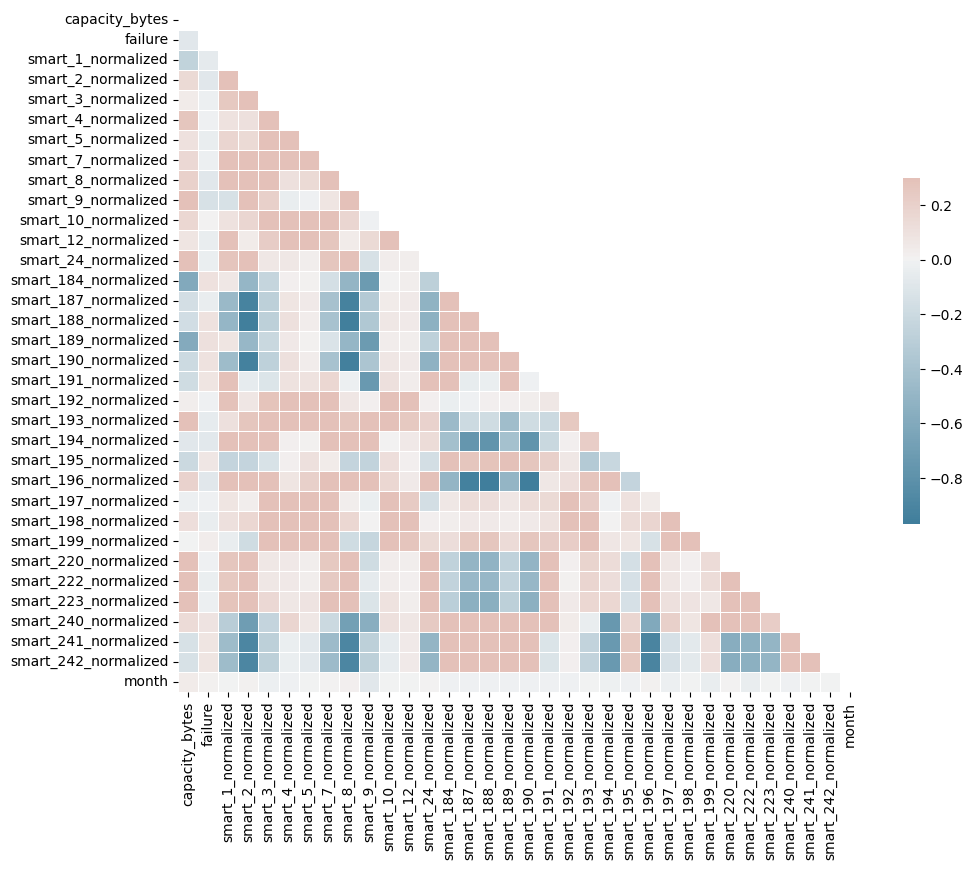

In [45]:
#checking the corrolation plot 
corrmat =new_dataset.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#plotting the matrix
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
# plotting pie plot to understand different values of failure column
custom_colors = ['#1DB9C3', '#EA5455']
counts = new_dataset['failure'].value_counts()
px.pie(new_dataset,names=counts.index,values = counts.values,title="Failure Class Counts Visualisation",hole=.5,color_discrete_sequence=custom_colors )

## Feature Engineering

In [47]:
#dropping failure column from data
target = new_dataset['failure']
targets= target.unique()
new_dataset.drop(['failure','month','date'],inplace=True,axis=1)

In [48]:
#Converting categorical target column to required format i.e. [0] or [1]
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder   # importing label encoder and min max scalar
label_enc = LabelEncoder()
new_dataset['model'] = label_enc.fit_transform(new_dataset['model'])
new_dataset['serial_number'] = label_enc.fit_transform(new_dataset['serial_number'])

In [49]:
sm=SMOTE(random_state=0)                                        # balancing imbalanced labels using smote oversampling
X, Y = sm.fit_resample(new_dataset, target)
print("The number of classes before fit {}".format(Counter(target)))
print("The number of classes after fit {}".format(Counter(Y)))

The number of classes before fit Counter({0: 54715, 1: 3154})
The number of classes after fit Counter({1: 54715, 0: 54715})


In [50]:
true_labels = ['0','1']         # visualising the data after data balancing
ex_values = Y.value_counts()
custom_colors = ['#1DB9C3', '#EA5455']
px.pie(ex_values,names=true_labels,values = ex_values,title="Failure Class Counts Visualisation",hole=.5,color_discrete_sequence=custom_colors )

In [51]:
#Scaling down features in range [0,1]
scaler = MinMaxScaler(feature_range=[0, 1])
final_df = scaler.fit_transform(X)

###### Since Data contains large number of columns which is nothing but the curse of Dimensionality and will lead to the highy complex and ineffective models along with large computation resource therefore extracting features based on the Feature Importance.

                 Feature  Importance
0   smart_196_normalized    0.653908
1     smart_5_normalized    0.081206
2   smart_198_normalized    0.038538
3   smart_184_normalized    0.022838
4   smart_187_normalized    0.022010
5     smart_2_normalized    0.019757
6     smart_7_normalized    0.016533
7   smart_199_normalized    0.016315
8    smart_24_normalized    0.015044
9         capacity_bytes    0.014112
10  smart_241_normalized    0.010171
11  smart_193_normalized    0.009283
12  smart_191_normalized    0.009215
13    smart_1_normalized    0.009134
14  smart_197_normalized    0.007582
15  smart_195_normalized    0.006626
16    smart_9_normalized    0.005935
17    smart_3_normalized    0.005369
18  smart_222_normalized    0.004973
19  smart_240_normalized    0.004902
20                 model    0.003996
21  smart_194_normalized    0.003939
22  smart_223_normalized    0.002984
23  smart_188_normalized    0.002942
24    smart_8_normalized    0.002745
25  smart_192_normalized    0.002601
2

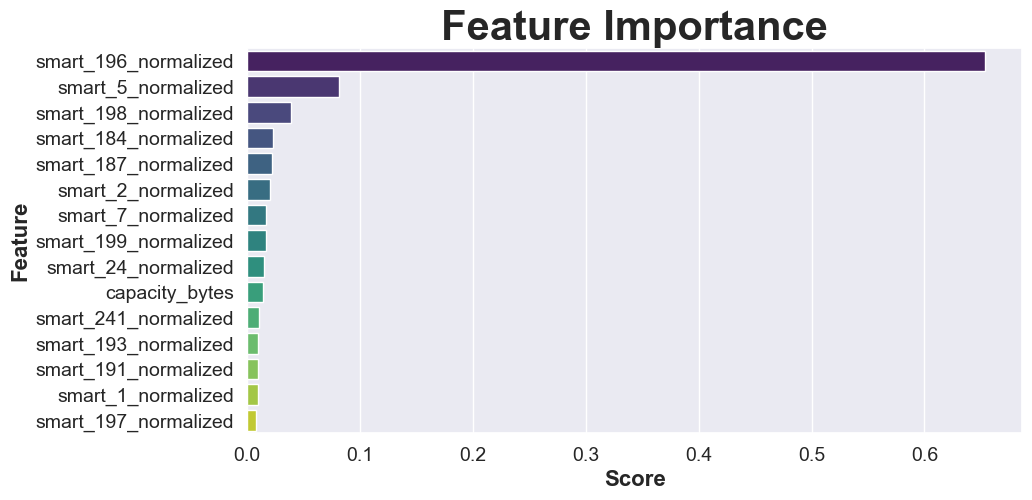

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df, Y, test_size=0.2, random_state=42, shuffle=True)

# Initializing the XGB Model
rf_model = xgb.XGBClassifier()

# Fitting the model to the training data
rf_model.fit(X_train, y_train)


# Getting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df.reset_index(drop=True)
# Displaying the feature importances
print(feature_importance_df)
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.5)  
custom_colors = sns.color_palette("viridis", n_colors=15)  # You can choose any color palette
plt.title('Feature Importance', fontsize=30, fontweight='bold')  # Adjust title font size and weight
ax = sns.barplot(data=feature_importance_df.head(15), x='Importance', y='Feature', palette=custom_colors)
# Adjust x-axis label font size and weight
ax.set_xlabel('Score', fontsize=16, fontweight='bold')
# Adjust y-axis label font size and weight
ax.set_ylabel('Feature', fontsize=16, fontweight='bold')
# Adjust x-axis tick font size and weight
ax.tick_params(axis='x', labelsize=14)
# Adjust y-axis tick font size and weight
ax.tick_params(axis='y', labelsize=14)
plt.show()

In [53]:
# Selecting the top features
top_10_features = feature_importance_df.head(15)['Feature']
# Extract only the columns with the top feature importances from X
X_top_10 = X[top_10_features]

In [55]:
#Scaling down features in range [0,1]
scaler = MinMaxScaler(feature_range=[0, 1])
final_dataset = scaler.fit_transform(X_top_10)

In [56]:
# train and test split of data
from sklearn.model_selection import train_test_split  # importing train test split library
X_train,X_test,Y_train,Y_test = train_test_split(final_dataset,Y,test_size=0.2,shuffle=True)   # splitting the data in train and test set

## Impelmenting Deep Learning Models

In [57]:
# importing libraries for model building
import tensorflow as tf    # importing tensorflow
import keras  # importing keras
from tensorflow.keras.models import Sequential      # importing different required modules from keras and tensorflow               
from tensorflow.keras.layers import Dense, Dropout, Activation,Embedding,Flatten,TimeDistributed   # importing different layers
from tensorflow.keras.layers import GRU  #Importing GRU Model
from keras.layers import SimpleRNN
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding,Flatten,Conv1D,MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,confusion_matrix,precision_score,recall_score,roc_auc_score,accuracy_score,classification_report

In [59]:
print(X_test.shape)   # getting shape of training data
label_test=Y_test      # assigining test labels to another variable

In [60]:
training_data = np.array(X_train).reshape((-1,1,X_train.shape[1]))    # shaping training data into required format
test_data = np.array(X_test).reshape((-1,1,X_test.shape[1]))      # shaping test data into required format

In [82]:
tf.keras.backend.clear_session()     # clearing all previous sessions

### Convolutional Neural Network

In [83]:
model1 =Sequential()    #adding sequential layer 
model1.add(tf.keras.layers.Input(shape=(1, X_train.shape[1])))   # adding input layer
model1.add(tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu'))   # adding conv 1d layer with 4 filters
model1.add(tf.keras.layers.Dropout(0.2))      # adding dropout layers
model1.add(tf.keras.layers.Conv1D(filters=4, kernel_size=1, activation='relu'))   # adding conv 1d layer with 4 filters
model1.add(tf.keras.layers.Flatten())   # adding flatten layer
model1.add(tf.keras.layers.Dense(200,activation='relu'))   # adding dense layer with 200 neurons
model1.add(tf.keras.layers.Dropout(0.2))      # adding dropout layers
model1.add(tf.keras.layers.Dense(20,activation='relu'))   # adding dense layer with 20 neurons
model1.add(tf.keras.layers.Dropout(0.2))      # adding dropout layers
model1.add(tf.keras.layers.Dense(1,"sigmoid"))    # adding prediction layer
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])    # compiling model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 4)              64        
                                                                 
 dropout (Dropout)           (None, 1, 4)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 4)              20        
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 200)               1000      
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                4

In [84]:
history1=model1.fit(training_data, Y_train, validation_data=(test_data, Y_test), batch_size= 64, epochs= 15)   # training CNN model

Epoch 1/15
1368/1368 [==============================] - 13s 6ms/step - loss: 0.6101 - accuracy: 0.6497 - precision: 0.6795 - recall: 0.5695 - val_loss: 0.8351 - val_accuracy: 0.5615 - val_precision: 0.5335 - val_recall: 0.9195
Epoch 2/15
1368/1368 [==============================] - 5s 4ms/step - loss: 0.5240 - accuracy: 0.7183 - precision: 0.8276 - recall: 0.5529 - val_loss: 1.3103 - val_accuracy: 0.5461 - val_precision: 0.5233 - val_recall: 0.9502
Epoch 3/15
1368/1368 [==============================] - 4s 3ms/step - loss: 0.5093 - accuracy: 0.7310 - precision: 0.8595 - recall: 0.5536 - val_loss: 1.3027 - val_accuracy: 0.5489 - val_precision: 0.5249 - val_recall: 0.9481
Epoch 4/15
1368/1368 [==============================] - 5s 4ms/step - loss: 0.4870 - accuracy: 0.7539 - precision: 0.8926 - recall: 0.5784 - val_loss: 1.3915 - val_accuracy: 0.5239 - val_precision: 0.5103 - val_recall: 0.9778
Epoch 5/15
1368/1368 [==============================] - 5s 4ms/step - loss: 0.4754 - accuracy: 

In [85]:
y_pred1 = model1.predict(test_data)  # making prediction on test data
y_pred1 = (y_pred1 >0.5)

684/684 [==============================] - 1s 1ms/step


In [86]:
# Calculating the accuracy, precision, recall and F1-score of CNN model on test data
accuracy1=accuracy_score(label_test,y_pred1)
precision1 = precision_score(label_test, y_pred1, average = 'weighted')
recall1 = recall_score(label_test, y_pred1, average = 'weighted')
f1_score1 = f1_score(label_test, y_pred1, average = 'weighted')
print("CNN Model Accuracy: %.2f%%" % (accuracy1*100))
print("CNN Model Precision: %.4f" % (precision1))
print("CNN Model Recall: %.4f" % (recall1))
print("CNN Model F1_score: %.4f" % (f1_score1))

CNN Model Accuracy: 52.37%
CNN Model Precision: 0.6456
CNN Model Recall: 0.5237
CNN Model F1_score: 0.4035


### Gated Recurrent Unit Model

In [87]:
#Building GRU model
tf.keras.backend.clear_session()     # clearing all previous sessions
model2=Sequential()                                # adding first layera as seq layer
model2.add(tf.keras.layers.Input(shape=(1, X_train.shape[1])))    # adding input layer
model2.add(tf.keras.layers.BatchNormalization())    # adding batch normalization layer
model2.add(GRU(256,return_sequences=True))      # Adding GRU layer with 256 neurons
model2.add(Dropout(0.4))   # adding dropout layer to avoid overfitting of model
model2.add(GRU(100,return_sequences=True))      # Adding GRU layer with 100 neurons
model2.add(Dropout(0.3))   # adding dropout layer to avoid overfitting of model
model2.add(GRU(80))      # Adding GRU layer with 80 neurons
model2.add(Dropout(0.4))   # adding dropout layer to avoid overfitting of model
model2.add(Dense(80,activation='relu'))   # adding dense layer with 80 neurons
model2.add(Dropout(0.3)) # adding dropout layer to avoid overfitting of model
model2.add(Dense(20,activation='relu'))   # adding dense layer with 20 neurons
model2.add(Dropout(0.2))    # adding dropout layer to avoid overfitting of model
model2.add(Dense(1,activation="sigmoid"))  # adding output layer with 1 neurons
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])  # compiling model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 1, 15)            60        
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 1, 256)            209664    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 100)            107400    
                                                                 
 dropout_1 (Dropout)         (None, 1, 100)            0         
                                                                 
 gru_2 (GRU)                 (None, 80)                43680     
                                                        

In [88]:
history2=model2.fit(training_data, Y_train, validation_data=(test_data, Y_test), batch_size= 64, epochs= 15)   # training gru model

Epoch 1/15
1368/1368 [==============================] - 58s 14ms/step - loss: 0.4998 - accuracy: 0.7433 - precision: 0.8711 - recall: 0.5723 - val_loss: 0.4529 - val_accuracy: 0.7709 - val_precision: 0.9743 - val_recall: 0.5524
Epoch 2/15
1368/1368 [==============================] - 23s 17ms/step - loss: 0.4766 - accuracy: 0.7583 - precision: 0.9167 - recall: 0.5693 - val_loss: 0.4522 - val_accuracy: 0.7724 - val_precision: 0.9793 - val_recall: 0.5525
Epoch 3/15
1368/1368 [==============================] - 24s 18ms/step - loss: 0.4717 - accuracy: 0.7596 - precision: 0.9231 - recall: 0.5676 - val_loss: 0.4521 - val_accuracy: 0.7676 - val_precision: 0.9794 - val_recall: 0.5426
Epoch 4/15
1368/1368 [==============================] - 24s 18ms/step - loss: 0.4677 - accuracy: 0.7631 - precision: 0.9237 - recall: 0.5747 - val_loss: 0.4647 - val_accuracy: 0.7686 - val_precision: 0.9785 - val_recall: 0.5453
Epoch 5/15
1368/1368 [==============================] - 23s 17ms/step - loss: 0.4624 - a

In [89]:
y_pred2 = model2.predict(test_data)  # making prediction on test data
y_pred2 = (y_pred2 >0.5)

684/684 [==============================] - 4s 4ms/step


In [91]:
# Calculating the accuracy, precision, recall and F1-score of GRU model on test data
accuracy2=accuracy_score(label_test,y_pred2)
precision2 = precision_score(label_test, y_pred2, average = 'weighted')
recall2 = recall_score(label_test, y_pred2, average = 'weighted')
f1_score2 = f1_score(label_test, y_pred2, average = 'weighted')
print("GRU Model Accuracy: %.2f%%" % (accuracy2*100))
print("GRU Model Precision: %.4f" % (precision2))
print("GRU Model Recall: %.4f" % (recall2))
print("GRU Model F1_score: %.4f" % (f1_score2))

GRU Model Accuracy: 79.24%
GRU Model Precision: 0.8404
GRU Model Recall: 0.7924
GRU Model F1_score: 0.7844


In [92]:
data_train = np.array(training_data).reshape((training_data.shape[0], 1, 1, X_train.shape[1]))   # reshaping the training data for Conv-GRU models
data_test = np.array(test_data).reshape((test_data.shape[0] ,1, 1, X_test.shape[1]))   # reshaping test data for conv-GRU models

### Convolutional - Gated Recurrent Unit Model 

In [93]:
tf.keras.backend.clear_session()    # clearing all previous sessions
model3 = Sequential()   # adding first layer as seq layer
model3.add(tf.keras.layers.Input(shape=(None,1, X_train.shape[1])))   # adding input layer
model3.add(tf.keras.layers.BatchNormalization())     # adding batch normlisation layer
model3.add(TimeDistributed(tf.keras.layers.Conv1D(filters=12, kernel_size=1, activation='relu')))   # adding conv layer with 12 filters
model3.add(TimeDistributed(tf.keras.layers.Flatten()))   # adding flatten layer
model3.add(GRU(256, return_sequences=True))   # adding GRU layer with 256 neurons
model3.add(Dropout(0.3))    # adding dropout layer to avoid overfitting of model
model3.add(GRU(130,return_sequences=True))  # adding GRU layer with 130 neurons
model3.add(Dropout(0.4))    # adding dropout layer to avoid overfitting of model
model3.add(GRU(80))  # adding GRU layer with 80 neurons
model3.add(Dropout(0.3))    # adding dropout layer to avoid overfitting of model
model3.add(Dense(80,activation='relu')) # adding dense layer with 80 neurons
model3.add(Dropout(0.3))    # adding dropout layer to avoid overfitting of model
model3.add(Dense(30,activation='relu')) # adding dense layer with 30 neurons
model3.add(Dropout(0.2))    # adding dropout layer to avoid overfitting of model
model3.add(Dense(1,activation='sigmoid')) # adding dense layer with 1 neurons for predicition
model3.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])  # compiling model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, None, 1, 15)      60        
 ormalization)                                                   
                                                                 
 time_distributed (TimeDistr  (None, None, 1, 12)      192       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 12)         0         
 tributed)                                                       
                                                                 
 gru (GRU)                   (None, None, 256)         207360    
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                        

In [94]:
history3=model3.fit(data_train, Y_train, validation_data=(data_test, Y_test), batch_size= 64, epochs= 15)  # training conv gru model

Epoch 1/15
1368/1368 [==============================] - 34s 18ms/step - loss: 0.4967 - accuracy: 0.7453 - precision: 0.8845 - recall: 0.5656 - val_loss: 0.4621 - val_accuracy: 0.7688 - val_precision: 0.9578 - val_recall: 0.5582
Epoch 2/15
1368/1368 [==============================] - 20s 15ms/step - loss: 0.4714 - accuracy: 0.7619 - precision: 0.9249 - recall: 0.5713 - val_loss: 0.4502 - val_accuracy: 0.7754 - val_precision: 0.9743 - val_recall: 0.5618
Epoch 3/15
1368/1368 [==============================] - 18s 13ms/step - loss: 0.4650 - accuracy: 0.7656 - precision: 0.9237 - recall: 0.5800 - val_loss: 0.4489 - val_accuracy: 0.7688 - val_precision: 0.9779 - val_recall: 0.5459
Epoch 4/15
1368/1368 [==============================] - 18s 13ms/step - loss: 0.4612 - accuracy: 0.7690 - precision: 0.9257 - recall: 0.5860 - val_loss: 0.4386 - val_accuracy: 0.7790 - val_precision: 0.9750 - val_recall: 0.5688
Epoch 5/15
1368/1368 [==============================] - 18s 13ms/step - loss: 0.4586 - a

In [95]:
y_pred3 = model3.predict(data_test)  # making prediction on test data
y_pred3 = (y_pred3 >0.5)

684/684 [==============================] - 3s 3ms/step


In [96]:
# Calculating the accuracy, precision, recall and F1-score of Conv-GRU model on test data
accuracy3=accuracy_score(label_test,y_pred3)
precision3 = precision_score(label_test, y_pred3, average = 'weighted')
recall3 = recall_score(label_test, y_pred3, average = 'weighted')
f1_score3 = f1_score(label_test, y_pred3, average = 'weighted')
print("Conv-GRU Model Accuracy: %.2f%%" % (accuracy3*100))
print("Conv-GRU Model Precision: %.4f" % (precision3))
print("Conv-GRU Model Recall: %.4f" % (recall3))
print("Conv-GRU Model F1_score: %.4f" % (f1_score3))

Conv-GRU Model Accuracy: 78.07%
Conv-GRU Model Precision: 0.8387
Conv-GRU Model Recall: 0.7807
Conv-GRU Model F1_score: 0.7704


## Applied Models Comparison

#### Accuracy Comparison of Models

In [97]:
fig = go.Figure(data=go.Scatter(
    y=history1.history["val_accuracy"],
    mode='lines+markers',
    marker=dict(size=np.array(history1.history["val_accuracy"])*15,
                color=np.array(history1.history["val_accuracy"])*50),
    name="CNN Model"
))


fig.add_trace(go.Scatter(
    y=history2.history["val_accuracy"],
    mode='lines+markers',
    marker=dict(size=np.array(history2.history["val_accuracy"])*15,
                color=np.array(history2.history["val_accuracy"])*50),
    name="GRU Model"
))

fig.add_trace(go.Scatter(
    y=history3.history["val_accuracy"],
    mode='lines+markers',
    marker=dict(size=np.array(history3.history["val_accuracy"])*15,
                color=np.array(history3.history["val_accuracy"])*50),
    name="CONV-GRU Model"
))

fig.update_layout(title=go.layout.Title(text="Test Accuracy Comparison",
                                        font=go.layout.title.Font(size=25)))

fig.show()

#### Precision Comparison of Models

In [98]:
fig = go.Figure(data=go.Scatter(
    y=history1.history["val_precision"],
    mode='lines+markers',
    marker=dict(size=np.array(history1.history["val_precision"])*15,
                color=np.array(history1.history["val_precision"])*50),
    name="CNN Model"
))


fig.add_trace(go.Scatter(
    y=history2.history["val_precision"],
    mode='lines+markers',
    marker=dict(size=np.array(history2.history["val_precision"])*15,
                color=np.array(history2.history["val_precision"])*50),
    name="GRU Model"
))

fig.add_trace(go.Scatter(
    y=history3.history["val_precision"],
    mode='lines+markers',
    marker=dict(size=np.array(history3.history["val_precision"])*15,
                color=np.array(history3.history["val_precision"])*50),
    name="CONV-GRU Model"
))

fig.update_layout(title=go.layout.Title(text="Test Precision Comparison",
                                        font=go.layout.title.Font(size=25)))

fig.show()

####  Recall Comparison of Models

In [99]:
fig = go.Figure(data=go.Scatter(
    y=history1.history["val_recall"],
    mode='lines+markers',
    marker=dict(size=np.array(history1.history["val_recall"])*15,
                color=np.array(history1.history["val_recall"])*50),
    name="CNN Model"
))


fig.add_trace(go.Scatter(
    y=history2.history["val_recall"],
    mode='lines+markers',
    marker=dict(size=np.array(history2.history["val_recall"])*15,
                color=np.array(history2.history["val_recall"])*50),
    name="GRU Model"
))

fig.add_trace(go.Scatter(
    y=history3.history["val_recall"],
    mode='lines+markers',
    marker=dict(size=np.array(history3.history["val_recall"])*15,
                color=np.array(history3.history["val_recall"])*50),
    name="CONV-GRU Model"
))

fig.update_layout(title=go.layout.Title(text="Test Recall Comparison",
                                        font=go.layout.title.Font(size=25)))

fig.show()

####  F1-Score Comparison of Models

In [100]:
fig = go.Figure(data=go.Scatter(
    y=(2*(np.array(history1.history["precision"])*np.array(history1.history["recall"]))/(np.array(history1.history["precision"])+np.array(history1.history["recall"]))).tolist(),
    mode='lines+markers',
    marker=dict(size=np.array(2*(np.array(history1.history["precision"])*np.array(history1.history["recall"]))/(np.array(history1.history["precision"])+np.array(history1.history["recall"])))*15,
                color=np.array(2*(np.array(history1.history["precision"])*np.array(history1.history["recall"]))/(np.array(history1.history["precision"])+np.array(history1.history["recall"])))*50),
    name="CNN Model"
))

fig.add_trace(go.Scatter(
    y=(2*(np.array(history2.history["precision"])*np.array(history2.history["recall"]))/(np.array(history2.history["precision"])+np.array(history2.history["recall"]))).tolist(),
    mode='lines+markers',
    marker=dict(size=np.array(2*(np.array(history2.history["precision"])*np.array(history2.history["recall"]))/(np.array(history2.history["precision"])+np.array(history2.history["recall"])))*15,
                color=np.array(2*(np.array(history2.history["precision"])*np.array(history2.history["recall"]))/(np.array(history2.history["precision"])+np.array(history2.history["recall"])))*50),
    name="GRU Model"
))

fig.add_trace(go.Scatter(
    y=(2*(np.array(history3.history["precision"])*np.array(history3.history["recall"]))/(np.array(history3.history["precision"])+np.array(history3.history["recall"]))).tolist(),
    mode='lines+markers',
    marker=dict(size=np.array(2*(np.array(history3.history["precision"])*np.array(history3.history["recall"]))/(np.array(history3.history["precision"])+np.array(history3.history["recall"])))*15,
                color=np.array(2*(np.array(history3.history["precision"])*np.array(history3.history["recall"]))/(np.array(history3.history["precision"])+np.array(history3.history["recall"])))*50),
    name="CONV-GRU Model"
))

fig.update_layout(title=go.layout.Title(text="Test F1-Score Comparison",
                                        font=go.layout.title.Font(size=25)))
fig.show()

####  Validation Loss Comparison of Models

In [101]:
fig = go.Figure(data=go.Scatter(
    y=history1.history["val_loss"],
    mode='lines+markers',
    marker=dict(size=np.array(history1.history["val_loss"])*5,
                color=np.array(history1.history["val_loss"])*10),
    name="CNN Model"
))


fig.add_trace(go.Scatter(
    y=history2.history["val_loss"],
    mode='lines+markers',
    marker=dict(size=np.array(history2.history["val_loss"])*5,
                color=np.array(history2.history["val_loss"])*10),
    name="GRU Model"
))

fig.add_trace(go.Scatter(
    y=history3.history["val_loss"],
    mode='lines+markers',
    marker=dict(size=np.array(history3.history["val_loss"])*5,
                color=np.array(history3.history["val_loss"])*10),
    name="CONV-GRU Model"
))

fig.update_layout(title=go.layout.Title(text="Test Loss Comparison",
                                        font=go.layout.title.Font(size=25)))

fig.show()

In [102]:
# model1.save('CNN.h5')
# model2.save('GRU.h5')
# model3.save('CONV_GRU.h5')